### coursera_capstone project: using logistic regression to distinguish tube station in New York and London by characteristics

In [1]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.19.0               |             py_0          53 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.19.0-py_0       conda-forge

The following packages will be UPDATED:

   

## Preparing Data Set

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/chitxxx/chitxxx_IBM_Coursera/master/homeless.csv")
df['Search Name']=df['Borough'] + ',London'
df.head()

,Borough,Number of households,White,Black or Black British,Asian or Asian British,Mixed,Other ethnic origin,Ethnic Group not Stated,Total Homless/Priority,"Number per 1,000 households",...,Total decisions,Bed and breakfast (including shared annexe),Hostels,LA/HA stock,Private sector leased (by LA or HA),Other types (including private landlord),Total in temporary accommodation,"Number per 1,000 households.1",Duty owed but no accommodation has been secured at end of March 2016,Search Name
0,Camden,111.774,37,20,25,0,0,6,94,0.84,...,132,22,29,15,134,195,395,3.53,36,"Camden,London"
1,City of London,5.084,0,0,0,0,0,0,7,1.38,...,19,0,0,0,0,0,15,2.95,0,"City of London,London"
2,Hackney,118.029,140,195,40,13,70,493,949,8.04,...,1344,291,747,499,195,1129,2861,24.24,467,"Hackney,London"
3,Hammersmith and Fulham,83.415,95,74,29,0,30,0,249,2.99,...,329,146,8,244,998,6,1402,16.81,0,"Hammersmith and Fulham,London"
4,Haringey,116.963,28,161,20,19,130,41,395,3.38,...,827,0,0,355,1057,1466,2943,25.16,5,"Haringey,London"


In [4]:
longitude=[]
latitude=[]
for i in range (0,14):
  address=df.iloc[i,22]
  geolocator = Nominatim()
  location = geolocator.geocode(address)
  longitude.append(location.longitude)
  latitude.append(location.latitude)
    

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [5]:
df['longitude']=longitude
df['latitude']=latitude
df.head()

,Borough,Number of households,White,Black or Black British,Asian or Asian British,Mixed,Other ethnic origin,Ethnic Group not Stated,Total Homless/Priority,"Number per 1,000 households",...,Hostels,LA/HA stock,Private sector leased (by LA or HA),Other types (including private landlord),Total in temporary accommodation,"Number per 1,000 households.1",Duty owed but no accommodation has been secured at end of March 2016,Search Name,longitude,latitude
0,Camden,111.774,37,20,25,0,0,6,94,0.84,...,29,15,134,195,395,3.53,36,"Camden,London",-0.139560,51.542305
1,City of London,5.084,0,0,0,0,0,0,7,1.38,...,0,0,0,0,15,2.95,0,"City of London,London",-0.091998,51.515618
2,Hackney,118.029,140,195,40,13,70,493,949,8.04,...,747,499,195,1129,2861,24.24,467,"Hackney,London",-0.049362,51.543240
3,Hammersmith and Fulham,83.415,95,74,29,0,30,0,249,2.99,...,8,244,998,6,1402,16.81,0,"Hammersmith and Fulham,London",-0.223640,51.492038
4,Haringey,116.963,28,161,20,19,130,41,395,3.38,...,0,355,1057,1466,2943,25.16,5,"Haringey,London",-0.111696,51.601489


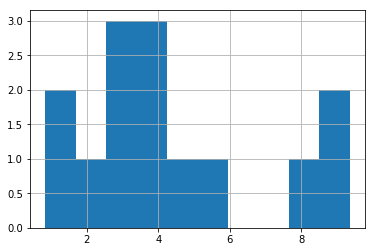

In [10]:
fig=df["Number per 1,000 households"].hist()
fig

In [11]:
#homeless heatmap
map = folium.Map(location=[df.iloc[1][24], df.iloc[1][23]],zoom_start=11) 
df['marker_color'] = pd.cut(df['Number per 1,000 households'], bins=4, 
                              labels=['green', 'yellow', 'orange', 'red'])
for i in range (0,14):
  folium.CircleMarker([df.iloc[i][24], df.iloc[i][23]],color=df.iloc[i][25],fill=True,radius=15).add_to(map)

map

In [12]:
#setup foursquare api
CLIENT_ID = 'QG3FAGY2LNM1N3OZD4N31UUARD2CV3NAOB0C2M0L0YZ4XBYT' # your Foursquare ID
CLIENT_SECRET = 'SZJDXIK31NZCBL3WIXHHF35Z4VBAYXL3DAIROEYX33O2OGCO' # your Foursquare Secret
VERSION = '20180604' 
LIMIT = 30

In [13]:
#setup serach 
search_query = 'McDonald\'s' #venue search key
radius = 2000 #radius of search
LIMIT=30
Version=20190505

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=McDonald'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
df_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Camden
City of London
Hackney
Hammersmith and Fulham
Haringey
Islington
Kensington and Chelsea
Lambeth
Lewisham
Newham
Southwark
Tower Hamlets
Wandsworth
Westminster


In [53]:
df_mc=df_venues[df_venues.Venue == 'McDonald\'s']

In [54]:
df_mccount=df_mc.groupby(['Neighborhood']).size()

In [55]:
df_mcd=df_mccount.to_frame()

In [56]:
df_mcd=df_mcd.reset_index(drop=False)
df_mcd.columns=['Borough','mcd_count']

In [58]:
df_final=pd.merge(df,df_mcd,on="Borough",how='left')

In [60]:
#final data frame
df_final.head()

,Borough,Number of households,White,Black or Black British,Asian or Asian British,Mixed,Other ethnic origin,Ethnic Group not Stated,Total Homless/Priority,"Number per 1,000 households",...,Private sector leased (by LA or HA),Other types (including private landlord),Total in temporary accommodation,"Number per 1,000 households.1",Duty owed but no accommodation has been secured at end of March 2016,Search Name,longitude,latitude,marker_color,mcd_count
0,Camden,111.774,37,20,25,0,0,6,94,0.84,...,134,195,395,3.53,36,"Camden,London",-0.139560,51.542305,green,5
1,City of London,5.084,0,0,0,0,0,0,7,1.38,...,0,0,15,2.95,0,"City of London,London",-0.091998,51.515618,green,8
2,Hackney,118.029,140,195,40,13,70,493,949,8.04,...,195,1129,2861,24.24,467,"Hackney,London",-0.049362,51.543240,red,3
3,Hammersmith and Fulham,83.415,95,74,29,0,30,0,249,2.99,...,998,6,1402,16.81,0,"Hammersmith and Fulham,London",-0.223640,51.492038,yellow,3
4,Haringey,116.963,28,161,20,19,130,41,395,3.38,...,1057,1466,2943,25.16,5,"Haringey,London",-0.111696,51.601489,yellow,4


In [63]:
#mcdonald heatmap
map_mcd = folium.Map(location=[df.iloc[1][24], df.iloc[1][23]],zoom_start=11) 
df_final['marker_color'] = pd.cut(df_final['mcd_count'], bins=4, 
                              labels=['green', 'yellow', 'orange', 'red'])
for i in range (0,14):
  folium.CircleMarker([df.iloc[i][24], df.iloc[i][23]],color=df.iloc[i][25],fill=True,radius=15).add_to(map_mcd)

map_mcd

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


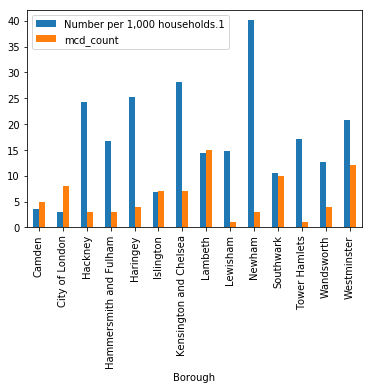

In [65]:
df.sort_values(by=['Number per 1,000 households.1'],ascending =False)
df_final.plot(x="Borough", y=["Number per 1,000 households.1","mcd_count"], kind="bar")
